In [5]:
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df[df['Co'] == df['Co'].max()]

,Ni,Cu,Co,Pd,Au,Pt,Rh,Fe,S,Ag,lat,long
11039,49995000.0,49995000.0,49995000.0,4.999500e+10,NaN,NaN,NaN,5870.0,NaN,49995000.0,-22.919194,123.216651
11040,100.0,49995000.0,49995000.0,4.999500e+10,NaN,NaN,NaN,6920.0,NaN,49995000.0,-22.919131,123.216661
11041,49995000.0,9200.0,49995000.0,4.999500e+10,NaN,NaN,NaN,7080.0,NaN,49995000.0,-22.919050,123.216651
11042,49995000.0,49995000.0,49995000.0,4.999500e+10,NaN,NaN,NaN,6900.0,NaN,49995000.0,-22.919005,123.216710
11043,49995000.0,49995000.0,49995000.0,4.999500e+10,NaN,NaN,NaN,7010.0,NaN,49995000.0,-22.918968,123.216739
...,...,...,...,...,...,...,...,...,...,...,...,...
347276,49995000.0,49995000.0,49995000.0,4.999500e+10,NaN,NaN,NaN,61995.0,NaN,49995000.0,-25.643335,120.658273
347277,49995000.0,49995000.0,49995000.0,4.999500e+10,NaN,NaN,NaN,62477.0,NaN,49995000.0,-25.644110,120.658689
347278,49995000.0,49995000.0,49995000.0,4.999500e+10,NaN,NaN,NaN,50958.0,NaN,49995000.0,-25.644654,120.658553
347279,49995000.0,49995000.0,49995000.0,4.999500e+10,NaN,NaN,NaN,56832.0,NaN,49995000.0,-25.641694,120.657990


In [ ]:
df_minerals = df.drop(columns=['lat', 'long'])
df_minerals.head(2)

,Ni,Cu,Co,Pd,Au,Pt,Rh,Fe,S,Ag
33,56.0,420.0,9.0,14.0,0.010,1.0,NaN,NaN,NaN,NaN
34,31.0,195.0,6.0,10.0,0.007,1.0,NaN,NaN,NaN,NaN


In [ ]:
df2 = np.log(df)
df3 = df.drop(columns=['Cu', 'Pd','Au','Pt','Rh','Fe','S','Ag','lat', 'long'])
df3 = np.log(df3)
df3[df3 == np.inf] = float('NaN')
df3[df3 == -np.inf] = float('NaN')
df3 = df3.dropna()
df3.head()

,Ni,Co
33,4.025352,2.197225
34,3.433987,1.791759
35,4.499810,2.708050
36,3.610918,2.397895
37,4.060443,2.639057


In [ ]:
y = df3['Co']
X = df3.drop(columns=['Co'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)



lr = LinearRegression()

lr.fit(X_train, y_train)
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

print(f"Train MSE: {mean_squared_error(train_preds, y_train)}")
print(f"Test MSE: {mean_squared_error(test_preds, y_test)}")

Train MSE: 2.1608107135416295
Test MSE: 2.220379533611178


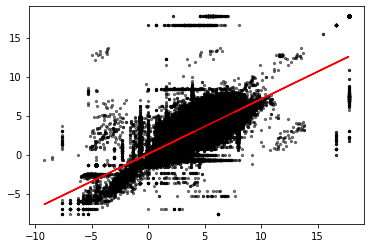

In [ ]:
plt.scatter(X, y,color='k', alpha=0.5, s=5)
plt.plot(X, lr.predict(X),color='r')

plt.show()

In [ ]:
df = pd.read_csv('Merged_Ni_lessthan15km.csv')
df.head(2)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.